In [127]:
#libraries for handling data
import pandas as pd
import numpy as np
import joblib
import os
pd.set_option('display.max_rows', None)

#libraries for visulation
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.offline as offline
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
offline.init_notebook_mode(connected=True) # Configure Plotly to run 
import statsmodels.api as sm
from scipy.stats import chi2_contingency

#Feature processing libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#algorithm libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


#pipelines and transformers
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

#model evaluation
from sklearn.metrics import classification_report,fbeta_score,make_scorer
from sklearn.metrics import confusion_matrix


## Data Loading

In [2]:
train= pd.read_csv(r"C:\Users\eMARS COMPUTERS\Desktop\Azubi Cohort 4\Fast API\Paitients_Files_Train.csv")
test=  pd.read_csv(r"C:\Users\eMARS COMPUTERS\Desktop\Azubi Cohort 4\Fast API\Paitients_Files_Test.csv")

In [3]:
train


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
5,ICU200015,5,116,74,0,0,25.6,0.201,30,1,Negative
6,ICU200016,3,78,50,32,88,31.0,0.248,26,0,Positive
7,ICU200017,10,115,0,0,0,35.3,0.134,29,1,Negative
8,ICU200018,2,197,70,45,543,30.5,0.158,53,1,Positive
9,ICU200019,8,125,96,0,0,0.0,0.232,54,1,Positive


In [4]:
new_column_names = {
    'PRG': 'Plasma Glucose',
    'PL': 'Blood Work Result 1',
    'PR': 'Blood Pressure',
    'SK': 'Blood Work Result 2',
    'TS': 'Blood Work Result 3',
    'M11': 'Body mass index',
    'BD2': 'Blood Work Result 4'
}

train.rename(columns=new_column_names, inplace=True)
test.rename(columns=new_column_names, inplace=True)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   599 non-null    object 
 1   Plasma Glucose       599 non-null    int64  
 2   Blood Work Result 1  599 non-null    int64  
 3   Blood Pressure       599 non-null    int64  
 4   Blood Work Result 2  599 non-null    int64  
 5   Blood Work Result 3  599 non-null    int64  
 6   Body mass index      599 non-null    float64
 7   Blood Work Result 4  599 non-null    float64
 8   Age                  599 non-null    int64  
 9   Insurance            599 non-null    int64  
 10  Sepssis              599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [6]:
test

,ID,Plasma Glucose,Blood Work Result 1,Blood Pressure,Blood Work Result 2,Blood Work Result 3,Body mass index,Blood Work Result 4,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0
5,ICU200614,4,183,0,0,0,28.4,0.212,36,1
6,ICU200615,1,124,60,32,0,35.8,0.514,21,1
7,ICU200616,1,181,78,42,293,40.0,1.258,22,1
8,ICU200617,1,92,62,25,41,19.5,0.482,25,0
9,ICU200618,0,152,82,39,272,41.5,0.270,27,0


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   169 non-null    object 
 1   Plasma Glucose       169 non-null    int64  
 2   Blood Work Result 1  169 non-null    int64  
 3   Blood Pressure       169 non-null    int64  
 4   Blood Work Result 2  169 non-null    int64  
 5   Blood Work Result 3  169 non-null    int64  
 6   Body mass index      169 non-null    float64
 7   Blood Work Result 4  169 non-null    float64
 8   Age                  169 non-null    int64  
 9   Insurance            169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


## Data Understanding

**PRG**: Plasma glucose

**PL**: Blood Work Result-1 (mu U/ml)

**PR**: Blood Pressure (mm Hg)

**SK**: Blood Work Result-2 (mm)

**TS**: Blood Work Result-3 (mu U/ml)

**M11**: Body mass index (weight in kg/(height in m)^2

**BD2**: Blood Work Result-4 (mu U/ml)

**Age**: patients age (years)

**Insurance**: If a patient holds a valid insurance card

**Sepsis**: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

In [8]:
#check for duplicated values
train.duplicated().sum()


0

In [9]:
test.duplicated().sum()


0

In [10]:
#view number of missing values
train.isnull().sum()

ID                     0
Plasma Glucose         0
Blood Work Result 1    0
Blood Pressure         0
Blood Work Result 2    0
Blood Work Result 3    0
Body mass index        0
Blood Work Result 4    0
Age                    0
Insurance              0
Sepssis                0
dtype: int64

In [11]:
test.isnull().sum()

ID                     0
Plasma Glucose         0
Blood Work Result 1    0
Blood Pressure         0
Blood Work Result 2    0
Blood Work Result 3    0
Body mass index        0
Blood Work Result 4    0
Age                    0
Insurance              0
dtype: int64

## Univariate Analysis On Sepsis Column

In [12]:
# Create a pie chart 
fig = px.pie(train, names="Sepssis", title='Sepsis Chart')

# Display the plot
fig.show()

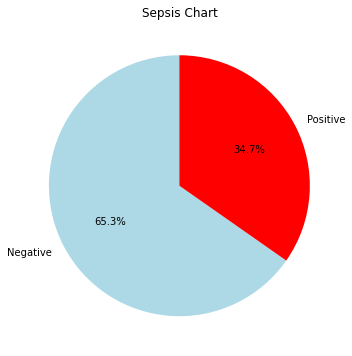

In [13]:
# Create a pie chart using Seaborn
plt.figure(figsize=(6, 6))
churn_counts = train["Sepssis"].value_counts()
#sns.set_palette("Set1")
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'red'])
plt.title('Sepsis Chart')

# Display the plot
plt.show()

## Data Splitting

### Modelling

In [14]:
#change the target variable in the train to binary using label encoder
le = LabelEncoder()
train['Sepssis'] = le.fit_transform(train['Sepssis'])

print(train)

            ID  Plasma Glucose  Blood Work Result 1  Blood Pressure  \
0    ICU200010               6                  148              72   
1    ICU200011               1                   85              66   
2    ICU200012               8                  183              64   
3    ICU200013               1                   89              66   
4    ICU200014               0                  137              40   
5    ICU200015               5                  116              74   
6    ICU200016               3                   78              50   
7    ICU200017              10                  115               0   
8    ICU200018               2                  197              70   
9    ICU200019               8                  125              96   
10   ICU200020               4                  110              92   
11   ICU200021              10                  168              74   
12   ICU200022              10                  139              80   
13   I

In [15]:
## create features and label
x= train.drop("Sepssis", axis=1)
y= train.Sepssis

In [16]:
x.head()

,ID,Plasma Glucose,Blood Work Result 1,Blood Pressure,Blood Work Result 2,Blood Work Result 3,Body mass index,Blood Work Result 4,Age,Insurance
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1


In [17]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Sepssis, dtype: int32

In [18]:
#drop the id column since it is not needed for modelling
x= x.drop("ID", axis=1)

In [19]:
# Split the data into training and testing sets, with stratification
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting sets
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (479, 9)
x_test shape: (120, 9)
y_train shape: (479,)
y_test shape: (120,)


In [20]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 161 to 395
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Plasma Glucose       479 non-null    int64  
 1   Blood Work Result 1  479 non-null    int64  
 2   Blood Pressure       479 non-null    int64  
 3   Blood Work Result 2  479 non-null    int64  
 4   Blood Work Result 3  479 non-null    int64  
 5   Body mass index      479 non-null    float64
 6   Blood Work Result 4  479 non-null    float64
 7   Age                  479 non-null    int64  
 8   Insurance            479 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 37.4 KB


In [21]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 479 entries, 161 to 395
Series name: Sepssis
Non-Null Count  Dtype
--------------  -----
479 non-null    int32
dtypes: int32(1)
memory usage: 5.6 KB


In [22]:
test= test.drop("ID", axis=1)

In [23]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 32 to 436
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Plasma Glucose       120 non-null    int64  
 1   Blood Work Result 1  120 non-null    int64  
 2   Blood Pressure       120 non-null    int64  
 3   Blood Work Result 2  120 non-null    int64  
 4   Blood Work Result 3  120 non-null    int64  
 5   Body mass index      120 non-null    float64
 6   Blood Work Result 4  120 non-null    float64
 7   Age                  120 non-null    int64  
 8   Insurance            120 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 9.4 KB


## Creating Pipeline

For our numeric values, we need to scale since we will be using models sensitive to unscaled values like SVM

In [24]:
#pipeline= Pipeline([("scaler", StandardScaler())])

#### Since our classification problem is binary we will use models designated for binary classification namely:
* LogisticRegression Classifier
* DecisionTree Classifier
* RandomForest Classifier
* Gradient Boosting (XGBoost)
* Support Vector Machines (SVM)

**Logistic Regression:** It's a simple and interpretable algorithm that works well for binary classification tasks like sepsis prediction. It's a good starting point and can provide insights into feature importance.

**Decision Tree:** Decision trees are simple yet powerful models that recursively split the data based on the most informative features. They are easy to interpret and can capture non-linear relationships. 

**Random Forest:** This ensemble algorithm combines multiple decision trees to improve predictive accuracy and control overfitting. It can handle non-linear relationships and interactions in the data.

**XGBoost:** A gradient boosting algorithm that's known for its performance and flexibility. It often performs well out of the box and handles missing values and non-linearity effectively.

**Support Vector Machines (SVM):** SVMs are good for handling high-dimensional data and can capture complex relationships between features. They work particularly well when there's a clear separation between classes.

## Logistic Regression Classifier

In [25]:
logReg = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', LogisticRegression(random_state=100))
])

In [26]:
# Train the pipeline on the training data
logReg.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(random_state=100))])

In [27]:
# Make predictions on the test set
logReg = logReg.predict(x_test)

In [28]:
# Evaluate the model
accuracy = accuracy_score(y_test, logReg)
classification_report_output = classification_report(y_test, logReg)


In [29]:
# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.7417
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        78
           1       0.63      0.62      0.63        42

    accuracy                           0.74       120
   macro avg       0.72      0.71      0.71       120
weighted avg       0.74      0.74      0.74       120



## Decision Tree Classifier

In [30]:
DecTree = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', DecisionTreeClassifier(random_state=100))
])

In [31]:
# Train the pipeline on the training data
DecTree.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeClassifier(random_state=100))])

In [32]:
# Make predictions on the test set
DecTree = DecTree.predict(x_test)

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, DecTree)
classification_report_output = classification_report(y_test, DecTree)


In [34]:
# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.7417
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        78
           1       0.65      0.57      0.61        42

    accuracy                           0.74       120
   macro avg       0.72      0.70      0.71       120
weighted avg       0.74      0.74      0.74       120



## Random Forest Pipeline

In [35]:
RanFor = Pipeline([
    ('scaler', StandardScaler()),  
   ("model", RandomForestClassifier(random_state= 100))
])

In [36]:
# Train the pipeline on the training data
RanFor.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=100))])

In [37]:
# Make predictions on the test set
RanFor = RanFor.predict(x_test)

In [38]:
# Evaluate the model
accuracy = accuracy_score(y_test, RanFor)
classification_report_output = classification_report(y_test, RanFor)

In [39]:
# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.7250
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        78
           1       0.62      0.57      0.59        42

    accuracy                           0.73       120
   macro avg       0.70      0.69      0.69       120
weighted avg       0.72      0.72      0.72       120



## XGBoost Pipeline

In [40]:
XGB = Pipeline([
    ('scaler', StandardScaler()),  
   ("model", XGBClassifier(random_state= 100))
])

In [41]:
# Train the pipeline on the training data
XGB.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
    

In [42]:
# Make predictions on the test set
XGB = XGB.predict(x_test)

In [43]:
# Evaluate the model
accuracy = accuracy_score(y_test, XGB)
classification_report_output = classification_report(y_test, XGB)

In [44]:
# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.6833
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        78
           1       0.55      0.52      0.54        42

    accuracy                           0.68       120
   macro avg       0.65      0.65      0.65       120
weighted avg       0.68      0.68      0.68       120



## SVM Pipeline

In [45]:
SVM = Pipeline([
    ('scaler', StandardScaler()),  
    ("model", SVC(random_state= 100))
])

In [46]:
# Train the pipeline on the training data
SVM.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(random_state=100))])

In [47]:
# Make predictions on the test set
SVM = SVM.predict(x_test)

In [48]:
# Evaluate the model
accuracy = accuracy_score(y_test, SVM)
classification_report_output = classification_report(y_test, SVM)

In [49]:
# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.7000
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        78
           1       0.58      0.50      0.54        42

    accuracy                           0.70       120
   macro avg       0.67      0.65      0.66       120
weighted avg       0.69      0.70      0.69       120



## Results After Modelling

In [50]:
## After modeling we get these results
results={"logReg": logReg, "DecTree":DecTree, "RanFor": RanFor, "XGB": XGB, "SVM":SVM}
  
for key,value in results.items():
    print(f"The performance of {key} is: \n\n", classification_report(y_test, value))  

The performance of logReg is: 

               precision    recall  f1-score   support

           0       0.80      0.81      0.80        78
           1       0.63      0.62      0.63        42

    accuracy                           0.74       120
   macro avg       0.72      0.71      0.71       120
weighted avg       0.74      0.74      0.74       120

The performance of DecTree is: 

               precision    recall  f1-score   support

           0       0.78      0.83      0.81        78
           1       0.65      0.57      0.61        42

    accuracy                           0.74       120
   macro avg       0.72      0.70      0.71       120
weighted avg       0.74      0.74      0.74       120

The performance of RanFor is: 

               precision    recall  f1-score   support

           0       0.78      0.81      0.79        78
           1       0.62      0.57      0.59        42

    accuracy                           0.73       120
   macro avg       0.70     

## Addressing Data Imbalance with Class Weight

In [51]:
## intialize class weight
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)

In [52]:
# Assign our weight to our class
weight= dict(zip([0, 1], class_weights))
print(weight)

{0: 0.7651757188498403, 1: 1.4427710843373494}


## Logistic Regression With Class Weights

In [53]:
logReg_CW = Pipeline([
    ('scaler', StandardScaler()),  
    ("model", LogisticRegression(random_state=100, class_weight=weight))
])

In [54]:
# Train the pipeline on the training data
logReg_CW.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight={0: 0.7651757188498403,
                                                  1: 1.4427710843373494},
                                    random_state=100))])

In [55]:
print(type(logReg_CW))

<class 'sklearn.pipeline.Pipeline'>


In [56]:
# Make predictions on the test set
logReg_CW= logReg_CW.predict(x_test)

In [57]:
# Evaluate the model
accuracy = accuracy_score(y_test, logReg_CW)
classification_report_output = classification_report(y_test, logReg_CW)

In [58]:
# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.7167
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.69      0.76        78
           1       0.57      0.76      0.65        42

    accuracy                           0.72       120
   macro avg       0.71      0.73      0.71       120
weighted avg       0.75      0.72      0.72       120



## Decision Tree With Class Weights

In [59]:
DecTRee_CW = Pipeline([
    ('scaler', StandardScaler()),  
    ("model", DecisionTreeClassifier(random_state= 100,class_weight=weight))
])

In [60]:
# Train the pipeline on the training data
DecTRee_CW.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(class_weight={0: 0.7651757188498403,
                                                      1: 1.4427710843373494},
                                        random_state=100))])

In [61]:
# Make predictions on the test set
DecTree_CW = DecTRee_CW.predict(x_test)

In [62]:
# Evaluate the model
accuracy = accuracy_score(y_test, DecTree_CW)
classification_report_output = classification_report(y_test, DecTree_CW)

In [63]:
# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.6667
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.78      0.75        78
           1       0.53      0.45      0.49        42

    accuracy                           0.67       120
   macro avg       0.63      0.62      0.62       120
weighted avg       0.66      0.67      0.66       120



## Random Forest With Class Weights

In [64]:
RanFor_CW = Pipeline([
    ('scaler', StandardScaler()),  
    ("model", RandomForestClassifier(random_state= 100,class_weight=weight))
])

In [65]:
# Train the pipeline on the training data
RanFor_CW.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight={0: 0.7651757188498403,
                                                      1: 1.4427710843373494},
                                        random_state=100))])

In [66]:
# Make predictions on the test set
RanFor_CW = RanFor_CW.predict(x_test)

In [67]:
# Evaluate the model
accuracy = accuracy_score(y_test, RanFor_CW)
classification_report_output = classification_report(y_test, RanFor_CW)

In [68]:
# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.6917
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        78
           1       0.56      0.52      0.54        42

    accuracy                           0.69       120
   macro avg       0.66      0.65      0.66       120
weighted avg       0.69      0.69      0.69       120



## XGB With Class Weights

In [69]:
# Set "scale_pos_weight" based on class balance

#### Scale_pos_weight is the parameter you set to the ratio of the number of negative examples to the number of positive examples

In [70]:
#we divide majority vs minority class
pos_weight = (sum(train["Sepssis"]== 0))/(sum(train["Sepssis"]== 1))

In [71]:
XGB_CW = Pipeline([
    ('scaler', StandardScaler()),  
   ("model", XGBClassifier(random_state= 100,scale_pos_weight=pos_weight))
])

In [72]:
# Train the pipeline on the training data
XGB_CW.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
    

In [73]:
# Make predictions on the test set
XGB_CW = XGB_CW.predict(x_test)

In [74]:
# Evaluate the model
accuracy = accuracy_score(y_test, XGB_CW)
classification_report_output = classification_report(y_test, XGB_CW)

In [75]:
# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.6917
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76        78
           1       0.56      0.60      0.57        42

    accuracy                           0.69       120
   macro avg       0.66      0.67      0.67       120
weighted avg       0.70      0.69      0.69       120



## SVM With Class Weights

In [76]:
SVM_CW = Pipeline([
    ('scaler', StandardScaler()),  
   ("model", SVC(random_state= 100,class_weight=weight))
])

In [77]:
# Train the pipeline on the training data
SVM_CW.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 SVC(class_weight={0: 0.7651757188498403,
                                   1: 1.4427710843373494},
                     random_state=100))])

In [78]:
# Make predictions on the test set
SVM_CW = SVM_CW.predict(x_test)

In [79]:
# Evaluate the model
accuracy = accuracy_score(y_test, SVM_CW)
classification_report_output = classification_report(y_test, SVM_CW)

In [80]:
# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.6667
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.65      0.72        78
           1       0.52      0.69      0.59        42

    accuracy                           0.67       120
   macro avg       0.66      0.67      0.66       120
weighted avg       0.70      0.67      0.67       120



## Addressing Data Imbalance With SMOTE

In [81]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [82]:
model = LogisticRegression(max_iter=1000)  # Increase the number of iterations
model.fit(x_train_resampled, y_train_resampled)


LogisticRegression(max_iter=1000)

In [83]:
logReg_SM = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, logReg_SM))
print("Classification Report:\n", classification_report(y_test, logReg_SM))


Accuracy: 0.7083333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76        78
           1       0.57      0.71      0.63        42

    accuracy                           0.71       120
   macro avg       0.69      0.71      0.70       120
weighted avg       0.73      0.71      0.71       120



In [84]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_resampled, y_train_resampled)

# Evaluation
DecTree_SM = dt_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, DecTree_SM))
print("Classification Report:\n", classification_report(y_test, DecTree_SM))

Accuracy: 0.675
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        78
           1       0.53      0.60      0.56        42

    accuracy                           0.68       120
   macro avg       0.65      0.66      0.65       120
weighted avg       0.68      0.68      0.68       120



In [85]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_resampled, y_train_resampled)

# Evaluation
RanFor_SM= rf_model.predict(x_test)
print(" Accuracy:", accuracy_score(y_test, RanFor_SM))
print("Classification Report:\n", classification_report(y_test, RanFor_SM))

 Accuracy: 0.675
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73        78
           1       0.53      0.64      0.58        42

    accuracy                           0.68       120
   macro avg       0.66      0.67      0.66       120
weighted avg       0.69      0.68      0.68       120



In [86]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train_resampled, y_train_resampled)

# Evaluation
XGB_SM = xgb_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test,XGB_SM))
print("Classification Report:\n", classification_report(y_test, XGB_SM))

Accuracy: 0.6833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.74        78
           1       0.54      0.64      0.59        42

    accuracy                           0.68       120
   macro avg       0.66      0.67      0.67       120
weighted avg       0.70      0.68      0.69       120



In [87]:
svm_model = SVC()
svm_model.fit(x_train_resampled, y_train_resampled)

# Evaluation
SVM_SM= svm_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test,SVM_SM))
print("Classification Report:\n", classification_report(y_test, SVM_SM))

Accuracy: 0.6916666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75        78
           1       0.55      0.67      0.60        42

    accuracy                           0.69       120
   macro avg       0.67      0.69      0.68       120
weighted avg       0.71      0.69      0.70       120



In [88]:
## create a dictionary for all the models 
result= {"logistic Regression": logReg,"Logistic Regression_CW":logReg_CW,"Logistic Regression_SM":logReg_SM,"decision tree":DecTree,"decision tree_CW":DecTree_CW,"decision tree_SM": DecTree_SM,"Random Forest": RanFor,"Random Forest_CW": RanFor_CW,"Random Forest_SM":RanFor_SM,"XGB": XGB,"XGB_CW": XGB_CW,"XGB_SM": XGB_SM,"SVM":SVM,"SVM_CW":SVM_CW,"SVM_SM": SVM_SM}

for key, value in result.items():
    print(f"Classification Report for {key}, is: \n\n",(classification_report(y_test,value)))

Classification Report for logistic Regression, is: 

               precision    recall  f1-score   support

           0       0.80      0.81      0.80        78
           1       0.63      0.62      0.63        42

    accuracy                           0.74       120
   macro avg       0.72      0.71      0.71       120
weighted avg       0.74      0.74      0.74       120

Classification Report for Logistic Regression_CW, is: 

               precision    recall  f1-score   support

           0       0.84      0.69      0.76        78
           1       0.57      0.76      0.65        42

    accuracy                           0.72       120
   macro avg       0.71      0.73      0.71       120
weighted avg       0.75      0.72      0.72       120

Classification Report for Logistic Regression_SM, is: 

               precision    recall  f1-score   support

           0       0.82      0.71      0.76        78
           1       0.57      0.71      0.63        42

    accuracy  

In [89]:
 #Create lists to store data
classifiers = []
precisions = []
accuracies = []
recalls = []
f1_scores = []
f2_scores = []


In [90]:
# Populate the lists with data
for key, value in result.items():
    report = classification_report(y_test, value, output_dict=True)
    f2 = fbeta_score(y_test, value, beta=2)
    
    classifiers.append(key)
    precisions.append(report["weighted avg"]["precision"])
    accuracies.append(report["accuracy"])
    recalls.append(report["weighted avg"]["recall"])
    f1_scores.append(report["weighted avg"]["f1-score"])
    f2_scores.append(f2)

In [91]:
# Create a DataFrame
data = {
    "Classifier": classifiers,
    "Precision": precisions,
    "Accuracy": accuracies,
    "Recall": recalls,
    "F1-Score": f1_scores,
    "F2-Score": f2_scores
}

df = pd.DataFrame(data)

In [92]:
#Sort the DataFrame based on desired metrics
sorted_df = df.sort_values(by=["Precision","Accuracy","F1-Score","Recall","F2-Score"], ascending=False)
sorted_df = sorted_df.reset_index(drop=True)

In [93]:
# Print the sorted DataFrame
(sorted_df)

,Classifier,Precision,Accuracy,Recall,F1-Score,F2-Score
0,Logistic Regression_CW,0.748437,0.716667,0.716667,0.722938,0.714286
1,logistic Regression,0.740306,0.741667,0.741667,0.740933,0.622010
2,decision tree,0.736063,0.741667,0.741667,0.737503,0.585366
3,Logistic Regression_SM,0.731695,0.708333,0.708333,0.714156,0.678733
4,Random Forest,0.720940,0.725000,0.725000,0.722502,0.579710
5,SVM_SM,0.710273,0.691667,0.691667,0.697147,0.639269
6,XGB_SM,0.699714,0.683333,0.683333,0.688543,0.619266
7,SVM_CW,0.699219,0.666667,0.666667,0.674044,0.647321
8,XGB_CW,0.697111,0.691667,0.691667,0.693960,0.586854
9,Random Forest_SM,0.693990,0.675000,0.675000,0.680777,0.616438


## The model chosen is the logistic regression with class weight

In [94]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, logReg_CW)


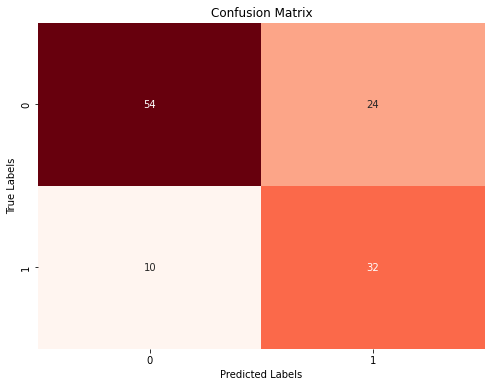

In [95]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Using K-Fold Validation

In [96]:
# Define the number of folds and other parameters
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=100)

In [97]:
# Assuming x_train has the features 'Plasma Glucose', 'Blood Work Result 1', ...
numerical_features = ['Plasma Glucose', 'Blood Work Result 1', 'Blood Pressure', 
                      'Blood Work Result 2', 'Blood Work Result 3', 
                      'Body mass index', 'Blood Work Result 4']

# Select only the numerical features using DataFrame indexing
x_train_numerical = x_train[numerical_features]

# Create a StandardScaler for numerical features
numerical_transformer = StandardScaler()

# Define the model (replace LogisticRegression with your model)
model = LogisticRegression(random_state=100, class_weight=weight)

# Bundle preprocessing and modeling code in a pipeline
logReg_CW = Pipeline(steps=[('scaler', numerical_transformer),
                             ('model', model)])

# Fit the pipeline to your training data
logReg_CW.fit(x_train_numerical, y_train)

# Now you can use cross_val_score
scores = cross_val_score(logReg_CW, x_train_numerical, y_train, cv=kf, scoring='accuracy')

In [98]:
# Print the evaluation scores for each fold
for fold, score in enumerate(scores):
    print(f"Fold {fold + 1} Accuracy: {score:.4f}")


Fold 1 Accuracy: 0.8125
Fold 2 Accuracy: 0.7083
Fold 3 Accuracy: 0.8333
Fold 4 Accuracy: 0.7292
Fold 5 Accuracy: 0.7500
Fold 6 Accuracy: 0.7292
Fold 7 Accuracy: 0.6667
Fold 8 Accuracy: 0.7292
Fold 9 Accuracy: 0.8333
Fold 10 Accuracy: 0.7872


In [99]:
#Print the average score across all folds
print(f"Average Accuracy: {scores.mean():.4f}")

Average Accuracy: 0.7579


## Hyperparameter Tuning


In [100]:
# Define the parameter grid for grid search
param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear'],

}


In [101]:
# Create the grid search object
grid_search = GridSearchCV(logReg_CW, param_grid=param_grid, cv=5, scoring='accuracy')

In [102]:
#Perform the grid search:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(class_weight={0: 0.7651757188498403,
                                                                         1: 1.4427710843373494},
                                                           random_state=100))]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear']},
             scoring='accuracy')

In [103]:
#Get the best parameter results and best_score
best_hyperparameters = grid_search.best_params_
best_score = grid_search.best_score_

print(f"best hyperparameters are:{best_hyperparameters}")
print(f"best score is {best_score}")


best hyperparameters are:{'model__C': 10, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
best score is 0.7599122807017544


## Making future predictions with best model

In [104]:
#### We get the best model
best_model = grid_search.best_estimator_

In [111]:
#view best model
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=10,
                                    class_weight={0: 0.7651757188498403,
                                                  1: 1.4427710843373494},
                                    penalty='l1', random_state=100,
                                    solver='liblinear'))])

In [115]:
###use best model to predict
final_result= best_model.predict(test)

In [116]:
# Create a new DataFrame to store the results
result_df = pd.DataFrame(final_result, columns=["Sepssis"])


In [117]:
# Concatenate the original test set and the result DataFrame along the columns
final_test_with_sepsis= pd.concat([test, result_df], axis=1)

In [118]:
#we view to confirm changes 
final_test_with_sepsis.head()

,Plasma Glucose,Blood Work Result 1,Blood Pressure,Blood Work Result 2,Blood Work Result 3,Body mass index,Blood Work Result 4,Age,Insurance,Sepssis
0,1,109,38,18,120,23.1,0.407,26,1,0
1,1,108,88,19,0,27.1,0.400,24,1,0
2,6,96,0,0,0,23.7,0.190,28,1,0
3,1,124,74,36,0,27.8,0.100,30,1,0
4,7,150,78,29,126,35.2,0.692,54,0,1


In [119]:
#After concatenating with the original we put it csv
final_test_with_sepsis.to_csv("final_test_set_sepsis.csv")

In [129]:
#specify the directory path you want to save the files
save_directory = r"C:\Users\eMARS COMPUTERS\Desktop\Azubi Cohort 4\Fast API"


#save the best model
save_path = os.path.join(save_directory, 'best_model.pkl')
joblib.dump(best_model, save_path)


['C:\\Users\\eMARS COMPUTERS\\Desktop\\Azubi Cohort 4\\Fast API\\best_model.pkl']

In [130]:
# Specify the file path
file_path = os.path.join(save_directory, 'best_model.pkl')

# Check if the file exists
if os.path.exists(file_path):
    print(f"The file '{file_path}' exists.")
else:
    print(f"The file '{file_path}' does not exist.")


The file 'C:\Users\eMARS COMPUTERS\Desktop\Azubi Cohort 4\Fast API\best_model.pkl' exists.
